# Tutorial 2. Constructing classifiers 

In this notebook we will cover the following:

1. [Building a simple classifier](#simple)
2. [Building a logistic regression classifier](#logistic)
3. [Building a Naive Bayes classifier](#nbayes)
4. [Splitting dataset for training/testing](#split)
5. [Evaluating accuracy using cross-validation](#crossval)
6. [Visualizing the confusion matrix](#confusion)
7. [Extracting the performance report](#report)
8. [Evaluaating cars based on their characteristics](#cars)
9. [Extracting validation curves](#valid)
10. [Extracting learning curves](#learning)
11. [Estimating the income bracket](#income)

In machine learning, classification is the process of using data characteristics to separate it into different classes. Different from regression, where the output is a real number, a supervised learning classifier builds a model using labeled training data to classify unknown data. Classification can be binary, separate data into two classes or multiclass, where more than 2 classes.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

## 2.1 Building a simple classifier <a class="anchor" id="simple"></a>

In [2]:
data = pd.DataFrame([[3,1],[2,5],[1,8],[6,4],[5,2],[3,5],[4,7],[4,-1]],columns=['x1','x2'])
data['y'] = [0,1,1,0,0,1,1,0] 
data.head()

,x1,x2,y
0,3,1,0
1,2,5,1
2,1,8,1
3,6,4,0
4,5,2,0


Separate data based on whether y=0 or y=1 and visualize with a scatter plot

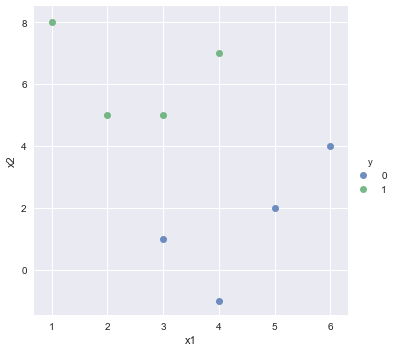

In [3]:
sns.lmplot("x1", "x2", data=data, hue='y', fit_reg=False)

We can see the points are separated in different regions, we can draw a line in-between them.

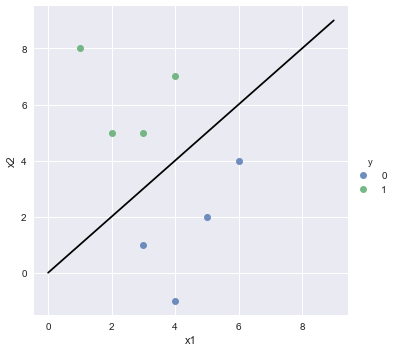

In [4]:
sns.lmplot("x1", "x2", data=data, hue='y', fit_reg=False)
plt.plot(range(10),range(10),'k')

The above is an example of simple classifier based on the data we have, follows the rule that if we have apoint (a,b) if a > b then it lies in y=0 and if a < b it lies in y=1. This is called a **linear classifier** since the separating line is straight and not curved.

## 2.2 Building a logistic regression classifier <a class="anchor" id="logistic"></a>
Given a data set of points, the goal is to build a model that can draw linear boundaries between the classes. It extracts these boundaries by solving a set of equations derived from the training data.

In [5]:
from sklearn import linear_model

data = pd.DataFrame([[4,7],[3.5,8],[3.1,6.2],[0.5,1],[1,2],[1.2,1.9],[6,2],[5.7,1.5],[5.4,2.2]],columns=['x1','x2'])
data['y'] = [0,0,0,1,1,1,2,2,2]
data.head()

,x1,x2,y
0,4.0,7.0,0
1,3.5,8.0,0
2,3.1,6.2,0
3,0.5,1.0,1
4,1.0,2.0,1


Visualize the data as before in a scatter plot, we see below there are 3 regions where the different classes are grouped together

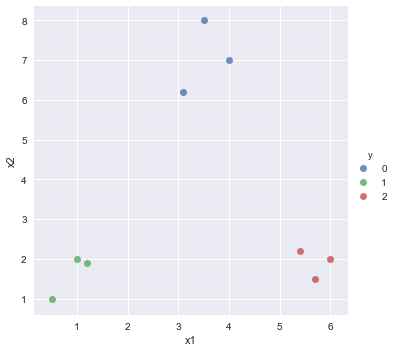

In [6]:
sns.lmplot("x1", "x2", data=data, hue='y', fit_reg=False)

### Logistic Regression Classifier
In the classifier below the parameters we use are *solver* which specifies the type of sovler that algorithm will use, and *C* controls the regularization strength where a higher value indicates a higher regularization strength.

In [7]:
classifier = linear_model.LogisticRegression(solver='liblinear',C=100)
classifier.fit(data[['x1','x2']],data['y'])

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Plot the boundary using the minimum/maximum from the input data, we're going to make this a function since will call on it later

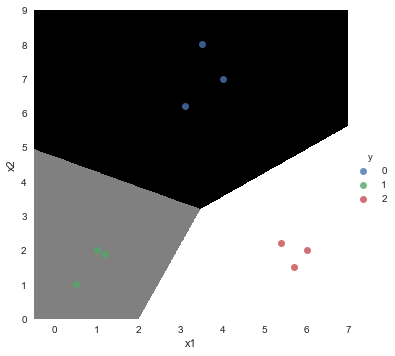

In [8]:
def classifier_boundary_2d(classifier,X):
    step_size = 0.01
    maxs  = X.max()
    mins  = X.min()
    x1,x2 = np.meshgrid(np.arange(mins.x1 -1,maxs.x1+1,step_size), np.arange(mins.x2-1,maxs.x2+1,step_size))
    output = classifier.predict(np.c_[x1.ravel(),x2.ravel()])
    output = output.reshape(x1.shape)
    return x1,x2,output

# Boundary
X = data[['x1','x2']];Y = data['y']
x1,x2,output = classifier_boundary_2d(classifier,X)
sns.lmplot("x1", "x2", data=data, hue='y', fit_reg=False)
plt.pcolormesh(x1,x2,output,cmap=plt.cm.gray,zorder=0)

Let's play around with the regularization parameter *C*, decreasing it weakens the regularization

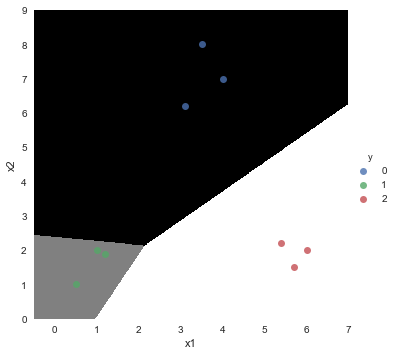

In [9]:
classifier = linear_model.LogisticRegression(solver='liblinear',C=1)
classifier.fit(data[['x1','x2']],data['y'])
#Plot
output = classifier.predict(np.c_[x1.ravel(),x2.ravel()])
output = output.reshape(x1.shape)

sns.lmplot("x1", "x2", data=data, hue='y', fit_reg=False)
plt.pcolormesh(x1,x2,output,cmap=plt.cm.gray,zorder=0)

Above seems to overfit the data, and is not optimal let's try larger one

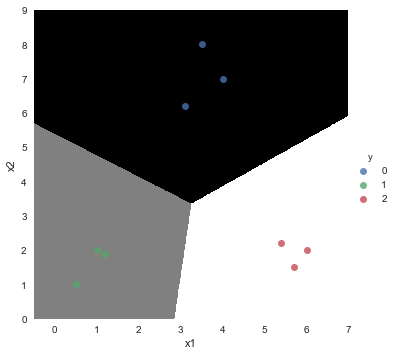

In [10]:
classifier = linear_model.LogisticRegression(solver='liblinear',C=1000000)
classifier.fit(data.drop(['y'],axis=1),data['y'])
#Plot
output = classifier.predict(np.c_[x1.ravel(),x2.ravel()])
output = output.reshape(x1.shape)

sns.lmplot("x1", "x2", data=data, hue='y', fit_reg=False)
plt.pcolormesh(x1,x2,output,cmap=plt.cm.gray,zorder=0)

This looks a bit better.

## 2.3 Building a Naive Bayes classifier<a class="anchor" id="nbayes"></a>
Naive Bayes classifier is a supervised learning classifier that uses Bayes' theorem to build the model. Use the data file *data_vultivar.txt* for this.

In [11]:
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('data_multivar.txt',names=['x1','x2','y'])
data.head()

,x1,x2,y
0,8.73,0.31,2
1,4.71,-0.42,3
2,4.58,6.18,1
3,9.38,2.18,2
4,4.78,5.28,1


As always good to plot the data first

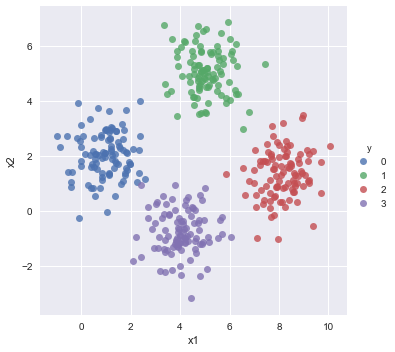

In [12]:
sns.lmplot("x1", "x2", data=data, hue='y', fit_reg=False)

From the above we can see there are 4 classes, and they appear to cluster distinctly in 4 regions shown. Let's build a Naive Bayes classifier for this data, and then compute the accuracy of the model.

In [13]:
classifier_nb = GaussianNB()
classifier_nb.fit(data.drop(['y'],axis=1),data.y)
y_pred = classifier_nb.predict(data.drop(['y'],axis=1))
# Accuracy 
accuracy = 100.*(data.y == y_pred).sum()/data.drop(['y'],axis=1).shape[0]
print('Accuracy of NB classifier =', accuracy)

Accuracy of NB classifier = 99.5


Let's make a plot like before

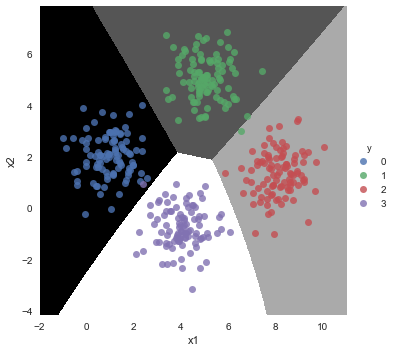

In [14]:
sns.lmplot("x1", "x2", data=data, hue='y', fit_reg=False)
x1,x2,output = classifier_boundary_2d(classifier_nb,data.drop(['y'],axis=1))
plt.pcolormesh(x1,x2,output,cmap=plt.cm.gray,zorder=0)

Can see that the classifier does a very good job on the training data, but how well will it do on unknown data? There is no restriction on the boundaries to be linear here.

## 2.4 Splitting dataset for training/testing <a class="anchor" id="split"></a>
Here we will split our data (same as in the previous section) into training and testing datasets

In [15]:
from sklearn import cross_validation

X = data.drop(['y'],axis=1); Y = data.y
Xtrain,Xtest,Ytrain,Ytest = cross_validation.train_test_split(X,Y,test_size=0.25,random_state=5)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


25% of data is now used for testing, let's repeat the previous section but for training data to fit the model.

In [16]:
classifier_nb_new = GaussianNB()
classifier_nb_new.fit(Xtrain,Ytrain)
Ypred_test = classifier_nb_new.predict(Xtest)
# Accuracy
accuracy = 100.*(Ytest == Ypred_test).sum()/Xtest.shape[0]
print('Accuracy of test data:',accuracy)

Accuracy of test data: 98.0


Can see it dropped about 1.5% compared to before. So let's plot the boundary and only the test data now.

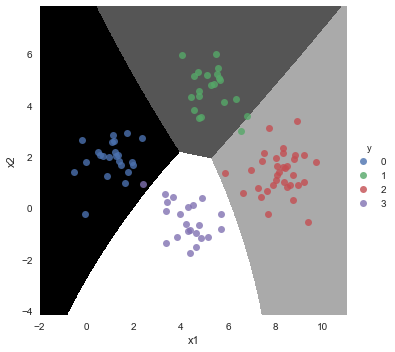

In [17]:
datatest = pd.DataFrame(Xtest);datatest['y'] = Ytest
sns.lmplot("x1", "x2", data=datatest, hue='y', fit_reg=False)
x1,x2,output = classifier_boundary_2d(classifier_nb_new,Xtrain)
plt.pcolormesh(x1,x2,output,cmap=plt.cm.gray,zorder=0)

In the above we see that the classifer does a reasonable job for the test data set.

## 2.5 Evaluating accuracy using cross-validation <a class="anchor" id="crossval"></a>
**Cross-validation** is an important part of machine learning. A more robust validation than just separating into training and test, is to repeat this process with different subsets. Fine-tuning for a particular subset may lead to overfitting, and it will fail to perform well on another subset. 

When dealing with a classifier, there are different performance metrics when compared to regression:
    - precision: number of items that are correctly classified as a percentage of the overall number of items
    - recall: the number of items that are retrieved as a percentage of the overall number of items in the training list
    - F1 score: 2*precision*recall/(precision+recall)

Example: Want to classify items in dataset as interesting or not. 100 items in dataset, we use classifier to identify 82 items for us, classifier picks out 73 as items of interest, only 65 are actually of interest and 8 misclassified.

    Precision:
    - Correct identifications = 65 (true positives)
    - Total number of identifications = 73 (true positives + false positives)
    - Precision = 65/73 = 89%
    
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

    Recall:
    - Total # of interesting items in the dataset = 82 (true positives + false negatives)
    - Number of items retrieved correctly = 65 (true positives
    - Recall = 65/82 = 79%

The recall is intuitively the ability of the classifier to find all the positive samples.

    F1 Score:
    - F1_score = 0.84
    
### Cross validation on classifier in last section

#### Accuracy

In [18]:
num_validations = 5
accuracy = cross_validation.cross_val_score(classifier_nb,X,Y,scoring='accuracy', cv=num_validations)
print(accuracy)
print('mean=',accuracy.mean())

[ 1.      1.      0.9875  1.      0.9875]
mean= 0.995


#### F1 Score

In [19]:
f1 = cross_validation.cross_val_score(classifier_nb,X,Y,scoring='f1_weighted', cv=num_validations)
print(accuracy)
print('mean=',f1.mean())

[ 1.      1.      0.9875  1.      0.9875]
mean= 0.994996873046


#### Precision

In [20]:
precis = cross_validation.cross_val_score(classifier_nb,X,Y,scoring='precision_weighted', cv=num_validations)
print(precis)
print('mean=',precis.mean())

[ 1.          1.          0.98809524  1.          0.98809524]
mean= 0.995238095238


#### Recall

In [21]:
recall = cross_validation.cross_val_score(classifier_nb,X,Y,scoring='recall_weighted', cv=num_validations)
print(recall)
print('mean=',recall.mean())

[ 1.      1.      0.9875  1.      0.9875]
mean= 0.995


## 2.6 Visualizing the confusion matrix <a class="anchor" id="confusion"></a>
Confusion matrix is a table that is commonly used to understand the performance of a classification model. Help identify which classes are being wronly classified.

In [22]:
from sklearn.metrics import confusion_matrix
# simple data
y_true=[1,0,0,2,1,0,3,3,3]
y_pred=[1,1,0,2,1,0,1,3,3]
conf_mat = confusion_matrix(y_true,y_pred)

Can see there are 4 classes in the simple data

In [23]:
# Visualization code taken from sklearn examples on confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


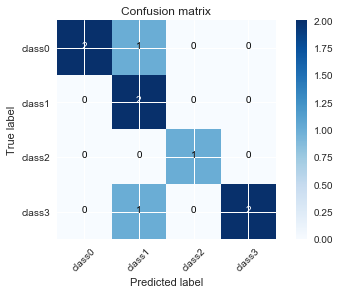

In [24]:
plot_confusion_matrix(conf_mat,['class0','class1','class2','class3'])

For a perfect model we would want the diagonals to be all strong.

Now let's use the classifier from 2.4 to make a confusion matrix

Confusion matrix, without normalization
[[23  0  0  0]
 [ 0 20  1  0]
 [ 0  0 34  0]
 [ 1  0  0 21]]


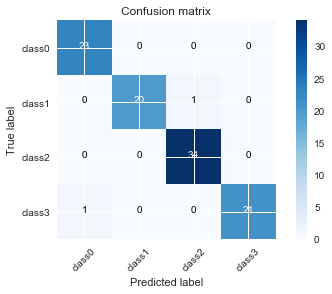

In [25]:
conf_mat2 = confusion_matrix(Ytest,Ypred_test)
plot_confusion_matrix(conf_mat2,['class0','class1','class2','class3'])

Can see that for the test data for Naive Bayes classifier it does a pretty good job.

## 2.7 Extracting a performance report  <a class="anchor" id="report"></a>
There is a function in scikit-learn that can directly print the performance report of precison, recall, and F1. Let's apply it to the same Naive Bayes clasifier problem earlier for the test data


In [26]:
from sklearn.metrics import classification_report
classes = ['class0','class1','class2','class3']

print(classification_report(Ytest,Ypred_test,target_names=classes))

             precision    recall  f1-score   support

     class0       0.96      1.00      0.98        23
     class1       1.00      0.95      0.98        21
     class2       0.97      1.00      0.99        34
     class3       1.00      0.95      0.98        22

avg / total       0.98      0.98      0.98       100



## 2.8 Evaluating cars based on their characteristics  <a class="anchor" id="cars"></a>
Use classification for real-world problem. Dataset contains details on cars such as doors, trunck space, maintenance costs, etc. The target classification is the quality of the car:

Class Values: 

unacc, acc, good, vgood 

Attributes: 

- buying: vhigh, high, med, low.
- maint: vhigh, high, med, low. 
- doors: 2, 3, 4, 5more. 
- persons: 2, 4, more. 
- lug_boot: small, med, big. 
- safety: low, med, high. 

Load in dataset *car.data.txt*

In [27]:
carDF = pd.read_csv('car.data.txt',names=['buying','maint','doors','persons','lugboot','safety','quality'])
display( carDF.head(5) );carDF.describe()

,buying,maint,doors,persons,lugboot,safety,quality
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


,buying,maint,doors,persons,lugboot,safety,quality
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,big,low,unacc
freq,432,432,432,576,576,576,1210


Can see there are no missing values in the dataset.

Make some barplots for buying and maintenance for quality.

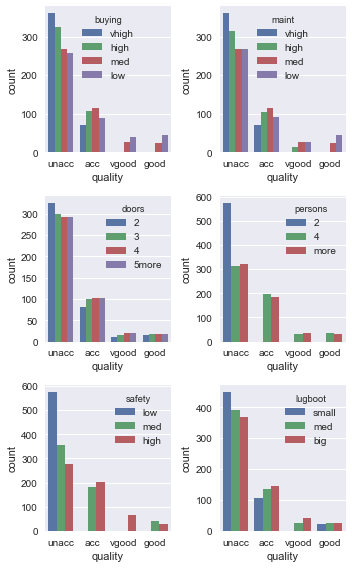

In [28]:
features=['buying','maint','doors','persons','safety','lugboot']
fig,axes=plt.subplots(3,2,figsize=[5,8])
for f,ax in zip(features,axes.ravel()):
    sns.countplot(x="quality", hue=f, data=carDF,ax=ax)
plt.tight_layout()


Seems like in terms of buying and mainteance, those who buy a car for a lot of money and have high maintenance are not happy with the quality of their car.

Now let's encode quality so we can get some statistics relative to the features

In [29]:
from sklearn import preprocessing
q_map = {'unacc':0,'acc':1,'good':2,'vgood':3}
carDF['quality'] = carDF.quality.map(q_map)
#qclasses = carDF.quality.unique().tolist();print(qclasses)
#q_le = preprocessing.LabelEncoder().fit(qclasses)
#carDF['quality'] = q_le.transform(carDF.quality)
carDF.head(5)

,buying,maint,doors,persons,lugboot,safety,quality
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


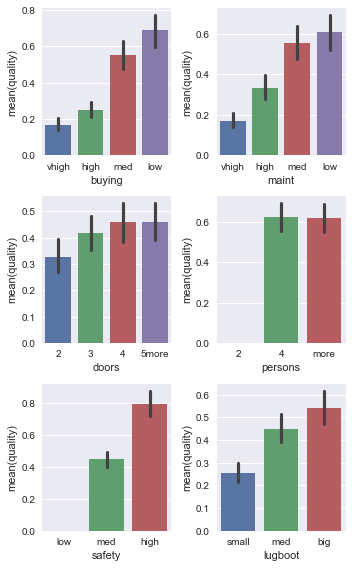

In [30]:
fig,axes=plt.subplots(3,2,figsize=[5,8])
for f,ax in zip(features,axes.ravel()):
    sns.barplot(x=f, y="quality", data=carDF,ax=ax)
plt.tight_layout()


From the above we see that buying a cheaper car results in higher quality rating, and same with lower maintenance costs. Looks like 3 and above doors have higher quality than 2 doors. Cars with 4 persons and more have tied quality and 2 persons is unacceptable. Safety is strongly correlated, all low safety are unacceptable. Lugboot is strongly correlated as well.

Now we can encode all the features

In [31]:
X = carDF.drop(['quality'],axis=1)
y = carDF.quality
X.head()

,buying,maint,doors,persons,lugboot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [32]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
X = X.apply(lambda x: d[x.name].fit_transform(x))
X.head()

,buying,maint,doors,persons,lugboot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


### Build and train classifier
Using random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators':200,'max_depth':10,'random_state':7}
clf_rf = RandomForestClassifier(**params)
clf_rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

Perform cross-validation we learned above

In [34]:
accuracy = cross_validation.cross_val_score(clf_rf,X,y,scoring='accuracy',cv=5)
print('Accuracy of the RF classifier:',round(100*accuracy.mean(),2),'%')
#Compare to NB Gaussian
clf_nb = GaussianNB()
clf_nb.fit(X,y)
accuracy = cross_validation.cross_val_score(clf_nb,X,y,scoring='accuracy',cv=5)
print('Accuracy of the Gaussian NB classifier:',round(100*accuracy.mean(),2),'%')

Accuracy of the RF classifier: 79.06 %
Accuracy of the Gaussian NB classifier: 60.59 %


We see above that the random forest classifier outperforms Naive Bayes classifier.

Below we test the classifier on a single data point.

In [35]:
car = pd.DataFrame(data=[ ['vhigh','vhigh','2','2','small','low']], columns=X.columns.values.tolist())
car

,buying,maint,doors,persons,lugboot,safety
0,vhigh,vhigh,2,2,small,low


In [36]:
# Using the previous dictionary to label future data
car = car.apply(lambda x: d[x.name].transform(x))
car.head()

,buying,maint,doors,persons,lugboot,safety
0,3,3,0,0,2,1


In [37]:
output =clf_rf.predict(car)
inv_q_map = {v: k for k, v in q_map.items()}
print('Car classified as:',inv_q_map[output[0]])

Car classified as: unacc


## 2.9 Extracting validation curves  <a class="anchor" id="valid"></a>
In the previous example we built a classifier but did not know how to define the initial parameters for the Random Forest Classifier, *n_estimators* and *max_depth*.  They are known as **hyperparameters** and performance of classifier depends on them. Validation curves inform how performance is affected with change in hyperparameters.

In [38]:
#Validation curves
from sklearn.learning_curve import validation_curve
clf = RandomForestClassifier(max_depth=4,random_state=7)
parameter_grid= np.linspace(25,200,8).astype(int)

train_scores, test_scores = validation_curve(clf,X,y,"n_estimators",parameter_grid,cv=5)
print("VALIDATION CURVES:\n",)
print('Param: n_estimators \n\n Training Scores:',train_scores)
print('Test Scores:',test_scores)

/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


VALIDATION CURVES:

Param: n_estimators 

 Training Scores: [[ 0.80680174  0.80824891  0.80752533  0.80463097  0.81358382]
 [ 0.79522431  0.80535456  0.81041968  0.8089725   0.81069364]
 [ 0.80101302  0.80680174  0.81114327  0.81476122  0.8150289 ]
 [ 0.8024602   0.80535456  0.81186686  0.80752533  0.80346821]
 [ 0.80028944  0.80463097  0.81114327  0.80824891  0.81069364]
 [ 0.80390738  0.80535456  0.81041968  0.80969609  0.81647399]
 [ 0.80390738  0.80463097  0.81114327  0.81476122  0.81719653]
 [ 0.80390738  0.80607815  0.81114327  0.81403763  0.81647399]]
Test Scores: [[ 0.71098266  0.76589595  0.72543353  0.76300578  0.75290698]
 [ 0.71098266  0.75433526  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.72254335  0.71965318  0.75722543  0.74418605]
 [ 0.71098266  0.71387283  0.71965318  0.75722543  0.72674419]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.74277457  0.71965318  0.75722543  0.74127907]
 [ 0.71098266  0.74566474  0.71965318  0.757

Make plots of curves

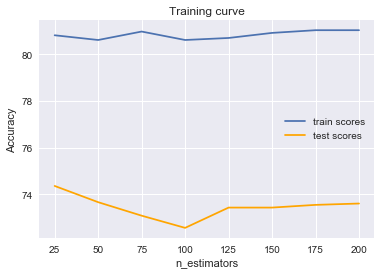

In [39]:
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis=1),label='train scores');plt.title('Training curve'),plt.xlabel('n_estimators');plt.ylabel('Accuracy')
plt.plot(parameter_grid,100*np.average(test_scores,axis=1),label='test scores',color='orange')
plt.legend()
         

Repeat for max_depth parameter

[[ 0.70043415  0.70043415  0.72865412  0.70043415  0.69942197]
 [ 0.80390738  0.80463097  0.81114327  0.81476122  0.81719653]
 [ 0.92402315  0.93270622  0.93198263  0.91389291  0.90895954]
 [ 0.97322721  0.97612156  0.97756874  0.98408104  0.97976879]
 [ 0.99855282  0.99855282  0.99710564  1.          0.99638728]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]]


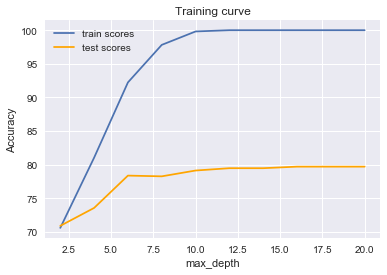

In [40]:
clf = RandomForestClassifier(n_estimators=175,random_state=7)
parameter_grid= np.linspace(2,20,10).astype(int)
train_scores, test_scores = validation_curve(clf,X,y,"max_depth",parameter_grid,cv=5)
print(train_scores)
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis=1),label='train scores');plt.title('Training curve'),plt.xlabel('max_depth');plt.ylabel('Accuracy')
plt.plot(parameter_grid,100*np.average(test_scores,axis=1),label='test scores',color='orange')
plt.legend()

Looks like the max_depth peaks at 15, and there is no gain after.

## 2.10 Extracting learning curves  <a class="anchor" id="learning"></a>
Learning curves help understand how sie of training data set influences the model.

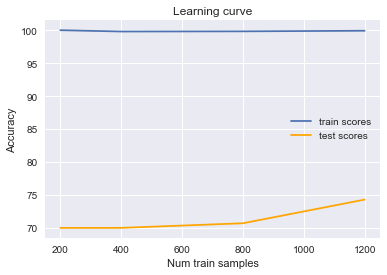

In [41]:
from sklearn.learning_curve import learning_curve

clf = RandomForestClassifier(random_state=7)
parameter_grid=np.array([200,400,800,1200])
train_sizes,train_scores,test_scores = learning_curve(clf,X,y,train_sizes=parameter_grid,cv=5)
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis=1),label='train scores');plt.title('Learning curve'),plt.xlabel('Num train samples');plt.ylabel('Accuracy')
plt.plot(parameter_grid,100*np.average(test_scores,axis=1),label='test scores',color='orange')
plt.legend()

See above how much gain there is for increasing sample training size, larger the better.

## 2.11 Estimating the income bracket  <a class="anchor" id="income"></a>
We will use a classifier to build a model to estimate income bracket from 14 attributes. Two possible outcomes are:
1. greater than 50K
2. less than or equal to50K

Data is in file *adult.data.txt* available here: https://archive.ics.uci.edu/ml/datasets/Census+Income

- **age**: continuous. 
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- **fnlwgt**: continuous. 
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- **education-num**: continuous. 
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- **sex**: Female, Male. 
- **capital-gain**: continuous. 
- **capital-loss**: continuous. 
- **hours-per-week**: continuous. 
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [42]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Load and examine the dataset

In [43]:
features = ['age','workcl','fnlwgt','edu','edu-num','mar-stat','occup','relshp','race','sex','cap-gain','cap-loss','hours','country']
incomeDF = pd.read_csv('adult.data.txt',names=features+['income'],skipinitialspace=True)
incomeDF.head()

,age,workcl,fnlwgt,edu,edu-num,mar-stat,occup,relshp,race,sex,cap-gain,cap-loss,hours,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
display( incomeDF.describe(include=[np.number]))
incomeDF.describe(include=['O'])

,age,fnlwgt,edu-num,cap-gain,cap-loss,hours
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


,workcl,edu,mar-stat,occup,relshp,race,sex,country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Since there are more <=50K earners, cookbook says it's better to select equal sample sizes so that there is no bias in the model - we can test this later not running this section of code.

In [45]:
highearn= incomeDF[incomeDF.income=='>50K'].sample(frac=1)
Nsam    = len(highearn.index)
lowearn = incomeDF[incomeDF.income=='<=50K'].sample(n=Nsam)
#combine
incomeDF = pd.concat([highearn,lowearn]).sample(frac=1) # randomize after concatenating
incomeDF.head()
incomeDF.describe()

,age,fnlwgt,edu-num,cap-gain,cap-loss,hours
count,15682.000000,1.568200e+04,15682.000000,15682.000000,15682.000000,15682.000000
mean,40.447775,1.891482e+05,10.625685,2077.924436,125.545402,42.084045
std,12.984697,1.043548e+05,2.615226,10501.450336,483.249168,12.216870
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.185050e+05,9.000000,0.000000,0.000000,40.000000
50%,40.000000,1.774030e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.349010e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,4356.000000,99.000000


We see from the above there are 6 numerical features and 8 categorical ones.

In [46]:
quantitative = ['age','fnlwgt','edu-num','cap-gain','cap-loss','hours']
categorical  = ['workcl','edu','mar-stat','occup','relshp','race','sex','country']

### Visualize Data

Make some plots for the features

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


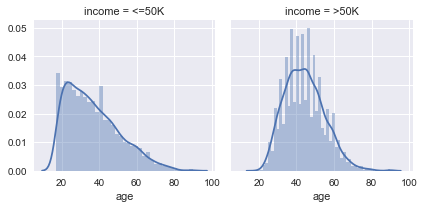

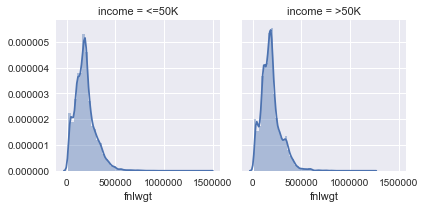

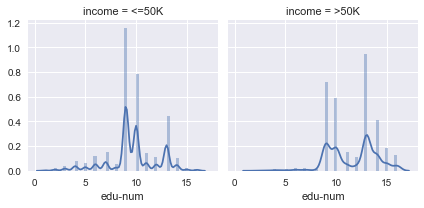

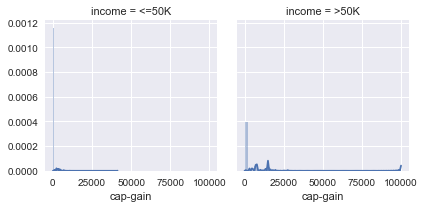

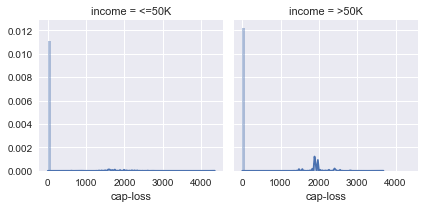

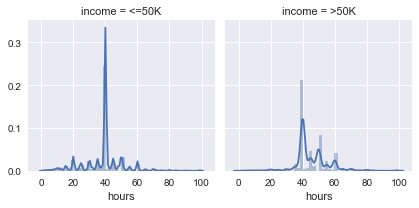

In [47]:
for quant in quantitative:
    g=sns.FacetGrid(data=incomeDF,col='income',col_wrap=2)
    g.map(sns.distplot,quant)

Since we're working with Naive Bayes there is no need to normalize numerical features since it does that by design, if we were doing K-neighbors then it would matter. But we can see that larger cap-loss, hours, cap-gain,edu-num,fnlwgt and age are associated with >50K.

Plot categorical features, but first need to encode income.

In [48]:
incomeDF['income'] = incomeDF.income.map( {'<=50K':0,'>50K':1})

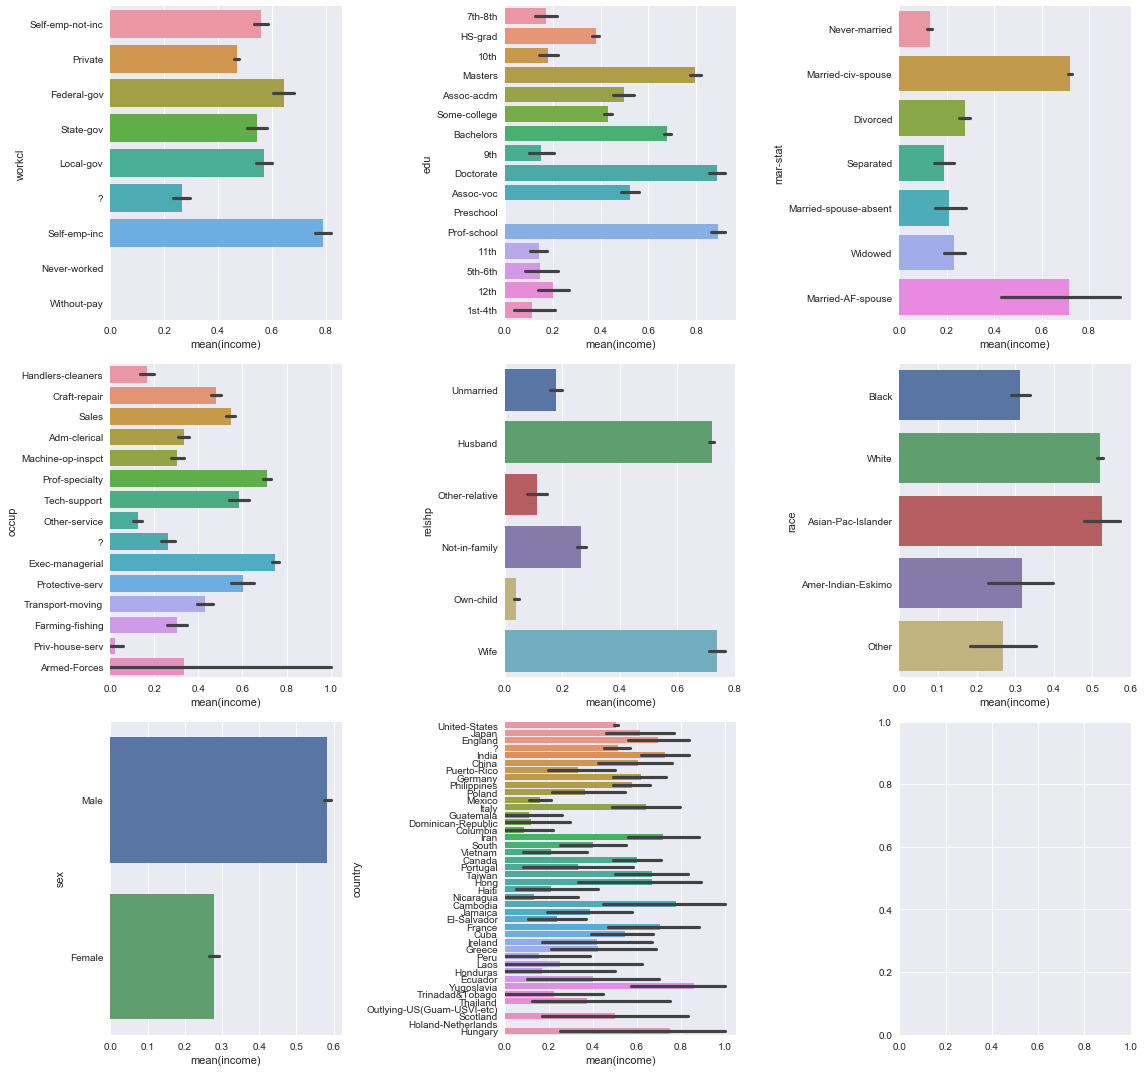

In [49]:
#Plots of categorical features
fig,axes=plt.subplots(3,3,figsize=[16,15])
for cat,ax in zip(categorical,axes.ravel()):
    sns.barplot(x='income', y=cat, data=incomeDF,ax=ax,orient='h')
plt.tight_layout()


There are relationships we would expect where certain educations and occupations are more likely to make more than 50K.

### Encode the categorical features

In [50]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
incomeDF[categorical] = incomeDF[categorical].apply(lambda x: d[x.name].fit_transform(x))
incomeDF.head()

,age,workcl,fnlwgt,edu,edu-num,mar-stat,occup,relshp,race,sex,cap-gain,cap-loss,hours,country,income
25276,34,6,120672,5,4,4,6,4,2,1,0,0,10,39,0
21577,37,6,68899,11,9,2,3,0,4,1,0,2129,40,39,0
28527,27,4,132805,0,6,4,12,2,4,1,0,1980,40,39,0
8905,26,4,152436,11,9,0,1,1,4,0,0,0,50,39,0
1330,25,4,188488,11,9,4,7,2,4,1,0,0,40,39,0


### Separate training and test data

In [51]:
X = incomeDF.drop(['income'],axis=1); y = incomeDF.income
Xtrain,Xtest,ytrain,ytest = cross_validation.train_test_split(X,y,test_size=0.2,random_state=5)

### Build Naive Bayes Classifier

Scores: [ 0.638942    0.62436224  0.6278699   0.61894133  0.625     ]
             precision    recall  f1-score   support

      <=50K       0.58      0.94      0.72      7841
       >50K       0.84      0.31      0.46      7841

avg / total       0.71      0.63      0.59     15682

Confusion matrix, without normalization
[[7386  455]
 [5394 2447]]


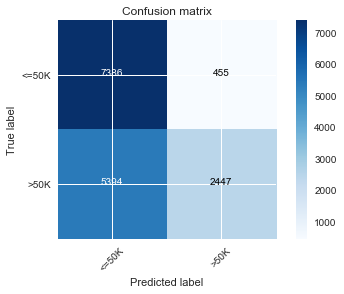

In [52]:
# Train classifier use K-fold cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict

clf_nb = GaussianNB()
scores_nb = cross_val_score(clf_nb, X,y, cv=5)
print('Scores:',scores_nb)
predict_nb = cross_val_predict(clf_nb, X,y, cv=5)
#Look at classification report and confusion matrix
print(classification_report(y,predict_nb,target_names=['<=50K','>50K']))
confmat_nb = confusion_matrix(y,predict_nb)
plot_confusion_matrix(confmat_nb,['<=50K','>50K'])

Can see from the above it is doing a poor job in correctly classifying earners >50K 

### Build Random Forest Classifier

             precision    recall  f1-score   support

      <=50K       0.87      0.77      0.81      7841
       >50K       0.79      0.88      0.83      7841

avg / total       0.83      0.83      0.82     15682

Confusion matrix, without normalization
[[6032 1809]
 [ 931 6910]]


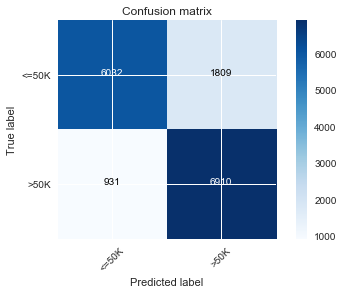

In [53]:
params = {'n_estimators':200,'max_depth':10,'random_state':7}

clf_rf = RandomForestClassifier(**params)
scores = cross_val_score(clf_rf, X,y, cv=5)
predict = cross_val_predict(clf_rf, X,y, cv=5)
#clf_rf.fit(Xtrain,ytrain)
#ypred_rf = clf_rf.predict(Xtest)
# Look at classification report and confusion matrix
print(classification_report(y,predict,target_names=['<=50K','>50K']))
confmat_rf = confusion_matrix(y,predict)
plot_confusion_matrix(confmat_rf,['<=50K','>50K'])

Our first go using Random Forest is better than Naive Bayes. We can try to search for optimal parameters. Since below we are doing cross-validation with our classifier we will use the full dataset, not just the training.

In [54]:
# Utility function to report best scores from grid_searches
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [55]:
from sklearn.model_selection import GridSearchCV,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from time import time 

clfs_rf = RandomForestClassifier()
cv = 5 #k-fold cross validation
param_dist = {"n_estimators":[200,1000,1500],
              "max_depth": [50,30,None],
              "max_features": sp_randint(1, 14),
              "min_samples_split": sp_randint(2, 14),
              "min_samples_leaf": sp_randint(10,100),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clfs_rf, param_distributions=param_dist,n_iter=n_iter_search,n_jobs=-1,cv=cv)
start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 462.87 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.825 (std: 0.008)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 1000}

Model with rank: 2
Mean validation score: 0.824 (std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 200}

Model with rank: 2
Mean validation score: 0.824 (std: 0.007)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 74, 'min_samples_split': 9, 'n_estimators': 1000}



             precision    recall  f1-score   support

      <=50K       0.89      0.79      0.83      1595
       >50K       0.80      0.90      0.85      1542

avg / total       0.85      0.84      0.84      3137

Confusion matrix, without normalization
[[1254  341]
 [ 155 1387]]


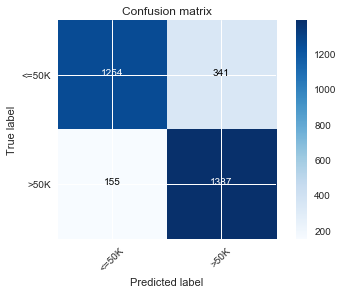

In [56]:
#Use #1 classifier for prediction
ypred_srf = random_search.predict(Xtest)
# Look at classification report and confusion matrix
print(classification_report(ytest,ypred_srf,target_names=['<=50K','>50K']))
confmat_srf = confusion_matrix(ytest,ypred_srf)
plot_confusion_matrix(confmat_srf,['<=50K','>50K'])